In [ ]:
                                     import pandas as pd
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt
sns.set_theme(color_codes=True)

In [ ]:
df = pd.read_csv('ABNB.csv')
df

,Date,Open,High,Low,Close,Adj Close,Volume
0,2020-12-11,146.550003,151.500000,135.100006,139.250000,139.250000,26980800
1,2020-12-14,135.000000,135.300003,125.160004,130.000000,130.000000,16966100
2,2020-12-15,126.690002,127.599998,121.500000,124.800003,124.800003,10914400
3,2020-12-16,125.830002,142.000000,124.910004,137.990005,137.990005,20409600
4,2020-12-17,143.000000,152.449997,142.669998,147.050003,147.050003,15054700
...,...,...,...,...,...,...,...
449,2022-09-26,101.779999,105.360001,101.559998,103.230003,103.230003,5278800
450,2022-09-27,106.040001,108.169998,104.139999,106.370003,106.370003,5081000
451,2022-09-28,106.700996,111.129997,105.779999,110.690002,110.690002,4518200
452,2022-09-29,109.190002,109.474998,105.169998,106.660004,106.660004,4259500


(array([-100.,    0.,  100.,  200.,  300.,  400.,  500.]),
 <a list of 7 Text major ticklabel objects>)

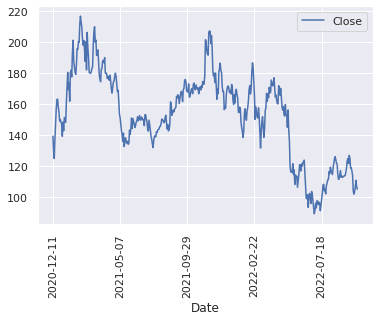

In [ ]:
df.plot(x='Date', y='Close')
plt.xticks(rotation=90)

In [ ]:
df['Date']=pd.to_datetime(df['Date'])
df2=df.set_index('Date')
df2.head()

,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2020-12-11,146.550003,151.500000,135.100006,139.250000,139.250000,26980800
2020-12-14,135.000000,135.300003,125.160004,130.000000,130.000000,16966100
2020-12-15,126.690002,127.599998,121.500000,124.800003,124.800003,10914400
2020-12-16,125.830002,142.000000,124.910004,137.990005,137.990005,20409600
2020-12-17,143.000000,152.449997,142.669998,147.050003,147.050003,15054700


In [ ]:
def create_features_datetime(df):
    
    df['Year']=df.index.year
    df['Month']=df.index.month
    df['dow']=df.index.day_of_week
    
    return df
df_tr=create_features_datetime(df2)
df_tr.head()

,Open,High,Low,Close,Adj Close,Volume,Year,Month,dow
Date,,,,,,,,,
2020-12-11,146.550003,151.500000,135.100006,139.250000,139.250000,26980800,2020,12,4
2020-12-14,135.000000,135.300003,125.160004,130.000000,130.000000,16966100,2020,12,0
2020-12-15,126.690002,127.599998,121.500000,124.800003,124.800003,10914400,2020,12,1
2020-12-16,125.830002,142.000000,124.910004,137.990005,137.990005,20409600,2020,12,2
2020-12-17,143.000000,152.449997,142.669998,147.050003,147.050003,15054700,2020,12,3


#Build Machine Learning Model

In [ ]:
X = df_tr.drop('Close', axis=1)
y = df_tr['Close']

In [ ]:
#test size 20% and train size 80%
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
X_train, X_test, y_train, y_test = train_test_split(X,y, test_size=0.2,random_state=0)

#Decision Tree Regressor

In [ ]:
from sklearn.tree import DecisionTreeRegressor
dtree = DecisionTreeRegressor(random_state=0)
dtree.fit(X_train, y_train)

DecisionTreeRegressor(random_state=0)

In [ ]:
from sklearn import metrics
import math
y_pred = dtree.predict(X_test)
mae = metrics.mean_absolute_error(y_test, y_pred)
mse = metrics.mean_squared_error(y_test, y_pred)
r2 = metrics.r2_score(y_test, y_pred)
rmse = math.sqrt(mse)

print('MAE is {}'.format(mae))
print('MSE is {}'.format(mse))
print('R2 score is {}'.format(r2))
print('RMSE score is {}'.format(rmse))

MAE is 0.3470327142857169
MSE is 0.269499517831574
R2 score is 0.9996783892298543
RMSE score is 0.5191334296995079


#Random Forest Regressor

In [ ]:
from sklearn.ensemble import RandomForestRegressor
rf = RandomForestRegressor(random_state=0)
rf.fit(X_train, y_train)

RandomForestRegressor(random_state=0)

In [ ]:
from sklearn import metrics
import math
y_pred = rf.predict(X_test)
mae = metrics.mean_absolute_error(y_test, y_pred)
mse = metrics.mean_squared_error(y_test, y_pred)
r2 = metrics.r2_score(y_test, y_pred)
rmse = math.sqrt(mse)

print('MAE is {}'.format(mae))
print('MSE is {}'.format(mse))
print('R2 score is {}'.format(r2))
print('RMSE score is {}'.format(rmse))

MAE is 0.29589454329670223
MSE is 0.2637844988276057
R2 score is 0.9996852093224394
RMSE score is 0.5135995510391396


#Visualize Random Forest Regressor

In [ ]:
pred=rf.predict(X)
y_pred_prob_df = pd.DataFrame(data=pred, columns=['Close_predict'])
df['Close_predict'] = y_pred_prob_df
df

,Date,Open,High,Low,Close,Adj Close,Volume,Close_predict
0,2020-12-11,146.550003,151.500000,135.100006,139.250000,139.250000,26980800,139.164899
1,2020-12-14,135.000000,135.300003,125.160004,130.000000,130.000000,16966100,130.719802
2,2020-12-15,126.690002,127.599998,121.500000,124.800003,124.800003,10914400,125.152402
3,2020-12-16,125.830002,142.000000,124.910004,137.990005,137.990005,20409600,136.527903
4,2020-12-17,143.000000,152.449997,142.669998,147.050003,147.050003,15054700,146.952300
...,...,...,...,...,...,...,...,...
449,2022-09-26,101.779999,105.360001,101.559998,103.230003,103.230003,5278800,103.366302
450,2022-09-27,106.040001,108.169998,104.139999,106.370003,106.370003,5081000,106.500002
451,2022-09-28,106.700996,111.129997,105.779999,110.690002,110.690002,4518200,110.838201
452,2022-09-29,109.190002,109.474998,105.169998,106.660004,106.660004,4259500,106.787003


In [ ]:
Date = df['Date']
Close = df['Close']
Close2 = df['Close_predict']

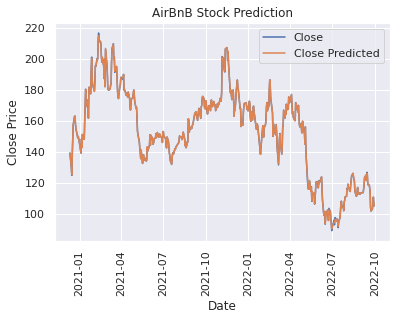

In [ ]:
plt.plot (Date,Close, label='Close')
plt.plot (Date,Close2, label='Close Predicted')
plt.title ('AirBnB Stock Prediction')
plt.xlabel ('Date')
plt.ylabel ('Close Price')
plt.legend(loc = 'upper right')
plt.xticks(rotation=90)
plt.show()